In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-new/fashion-mnist_test.csv
/kaggle/input/mnist-new/fashion-mnist_train.csv


In [31]:
train=pd.read_csv("/kaggle/input/mnist-new/fashion-mnist_train.csv")
test=pd.read_csv("/kaggle/input/mnist-new/fashion-mnist_test.csv")

In [32]:
test.shape

(10000, 785)

In [33]:
X_train=train.drop('label',axis=1)
X_test=test.drop('label',axis=1)

In [34]:
Y_train=train['label']
Y_test=test['label']

In [35]:
X_test=X_test/255

In [36]:
X_train=X_train/255

In [37]:
X_test=X_test.values.reshape(-1,28,28,1)

In [38]:
X_train=X_train.values.reshape(-1,28,28,1)

In [39]:
X_train.shape

(60000, 28, 28, 1)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [41]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(X_train,Y_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.7819 - loss: 0.6234
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8836 - loss: 0.3292


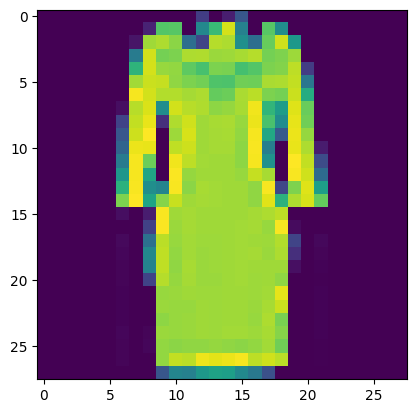

In [46]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(X_train[i])
    plt.plot()

In [52]:
y_predict=model.predict(X_test[14:15])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [56]:
y_test[14:15]

array([4], dtype=uint8)

In [53]:
import numpy as np
np.argmax(y_predict)

8

In [50]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8889 - loss: 0.3115


[0.30772635340690613, 0.8913999795913696]